In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("50_startups.csv")

In [19]:
df.shape

(108, 5)

In [27]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
corr=df.corr()
corr

/var/folders/75/l1625v4n7qnbfp296v2f82ch0000gn/T/ipykernel_6744/3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


### independant and dependant should have good correlation but independant and independant should not have good correlation(marketing spend and R&D spend) solution is if there are highly correlated independant colums then just drop it.

In [4]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [31]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [32]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

<Axes: xlabel='State', ylabel='Profit'>

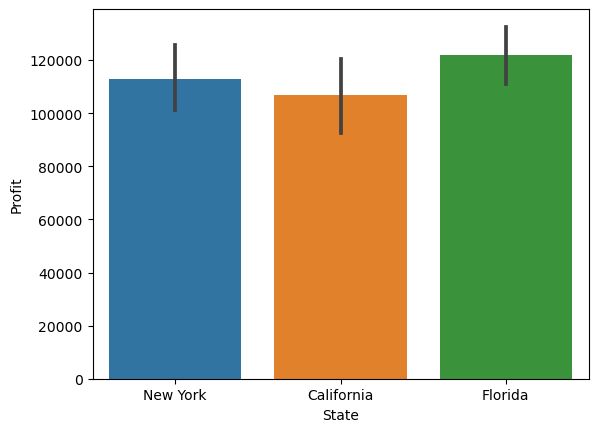

In [43]:
sns.barplot(x=df["State"],y=df["Profit"])

# Outlier detection and replacement start

<Axes: >

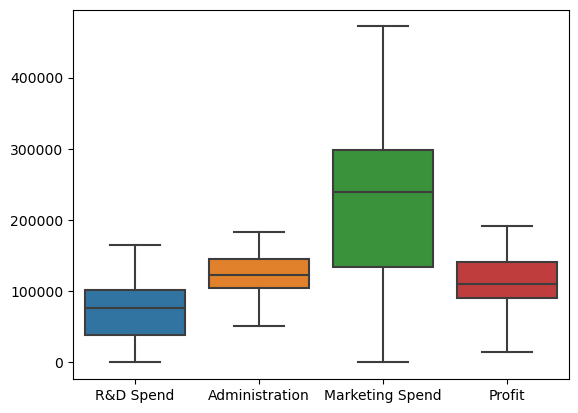

In [41]:
sns.boxplot(df)

<Axes: >

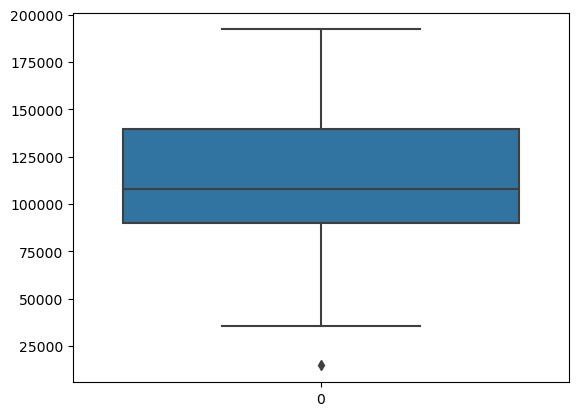

In [13]:
sns.boxplot(df.Profit)

In [37]:
q1=df.Profit.quantile(0.25)
q3=df.Profit.quantile(0.75)
iqr=q3-q1
lower_limit=iqr-q1*1.5

In [34]:
df.median()

/var/folders/75/l1625v4n7qnbfp296v2f82ch0000gn/T/ipykernel_6744/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


R&D Spend           75791.365
Administration     122699.795
Marketing Spend    239452.750
Profit             109543.120
dtype: float64

In [38]:
df.Profit=np.where(df.Profit<lower_limit,109543.120,df.Profit)

<Axes: >

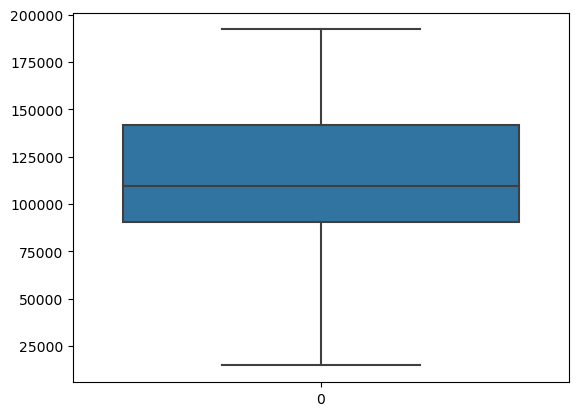

In [42]:
sns.boxplot(df.Profit)

# Outlier detection and replacement end

# Seperating independant and dependant values

In [53]:
x=df.iloc[:,0:4]
y=df["Profit"]

In [55]:
type(y)

pandas.core.series.Series

# Ecoding

In [58]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
x["State"]=le.fit_transform(x["State"])
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [65]:
print(le.classes_)

[0 1 2]


In [66]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping
#This is suppoed to give the state name along the encoding number

{0: 0, 1: 1, 2: 2}

# Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [82]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [83]:
type(x_scaled)

numpy.ndarray

# splitting testing and training

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [88]:
x_test.shape

(22, 4)

# Model Building

### for multilinear regression model also we use the linear regression, just that the independant has multiple variables

### importing libraries

In [90]:
from sklearn.linear_model import LinearRegression

### initialise the model

In [91]:
lr=LinearRegression()

### Train the model

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

### Test the model

In [95]:
y_pred=lr.predict(x_test)

In [98]:
profit=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [99]:
profit

,Actual,Predicted
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


### Random Value Prediction

In [106]:
lr.predict(ms.transform([[15000,43233,47711,0]]))

/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([60662.42016106])

### Evaluatioin of model

In [107]:
score=lr.score(x_test,y_test)

In [109]:
score

0.9258962347553817

In [110]:
from sklearn import metrics

In [112]:
# R-square
metrics.r2_score(y_test,y_pred)

0.9258962347553817

In [113]:
metrics.mean_squared_error(y_test,y_pred)

96015241.54707713

In [117]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

9798.736732205694

In [ ]:
fit --> train your model, your data is not changed
fit transform --> after fitting data is transformed
transform --> data is transformed.